## Welcome

This is material for the **Directed Acyclical Graphs** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)


In [16]:
# pip install stargazer
# pip install plotnine

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

import plotnine as p

In [18]:
# read data
def read_data(file):
    return pd.read_csv("https://raw.github.com/scunning1975/mixtape/master/" + file)


## Collider - Discrimination

In [19]:
tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size=10000),
    'ability': np.random.normal(size=10000)})
tb

,female,ability
0,1,0.369399
1,1,1.055127
2,1,-0.620825
3,0,1.689515
4,0,-1.902932
...,...,...
9995,1,1.334016
9996,1,0.303908
9997,0,0.760101
9998,0,-0.819591


In [21]:
tb['discrimination'] = tb.female.copy()

In [23]:
tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)

In [24]:
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 

In [26]:
lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()


st = Stargazer((lm_1,lm_2,lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
st

#### QUESTIONS
- What is the true direct effect of discrimination on wages?  
- Explain the channels by which discrimination impacts wages.  
- What makes occupation a collider?
- What controls are necessary to eliminate this collider bias?



## Movie Star

In [27]:
start_is_born = pd.DataFrame({
    'beauty': np.random.normal(size=2500),
    'talent': np.random.normal(size=2500)})

In [29]:
start_is_born['score'] = start_is_born['beauty'] + start_is_born['talent']
start_is_born['c85'] = np.percentile(start_is_born['score'], q=85)
start_is_born

,beauty,talent,score,c85
0,-2.159011,0.229835,-1.929176,1.448352
1,-1.320130,-0.056286,-1.376416,1.448352
2,-0.721124,-0.466171,-1.187295,1.448352
3,-0.045578,-1.156325,-1.201903,1.448352
4,1.625323,0.193038,1.818361,1.448352
...,...,...,...,...
2495,0.140670,-0.890755,-0.750085,1.448352
2496,0.599515,0.765330,1.364844,1.448352
2497,-1.201930,0.882270,-0.319660,1.448352
2498,0.328829,-0.101198,0.227632,1.448352


In [32]:
start_is_born['star'] = 0
start_is_born.loc[start_is_born['score']>start_is_born['c85'], 'star'] = 1

C:\Users\MSI-NB\anaconda3\envs\tensorflow_2\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


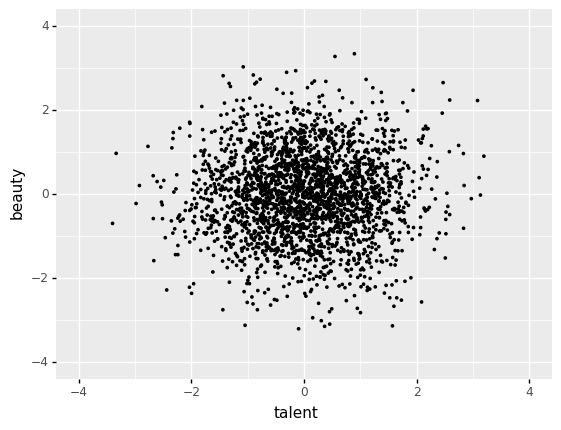

<ggplot: (172168538218)>

In [33]:
lm = sm.OLS.from_formula('beauty ~ talent', data=start_is_born).fit()

p.ggplot(start_is_born, p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

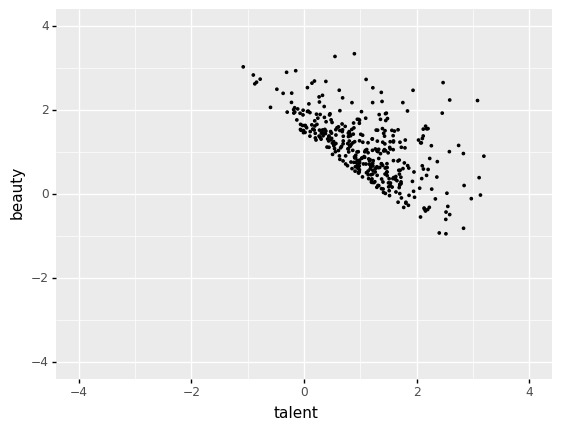

<ggplot: (172169717523)>

In [34]:
p.ggplot(start_is_born[start_is_born.star==1], p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

C:\Users\MSI-NB\anaconda3\envs\tensorflow_2\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


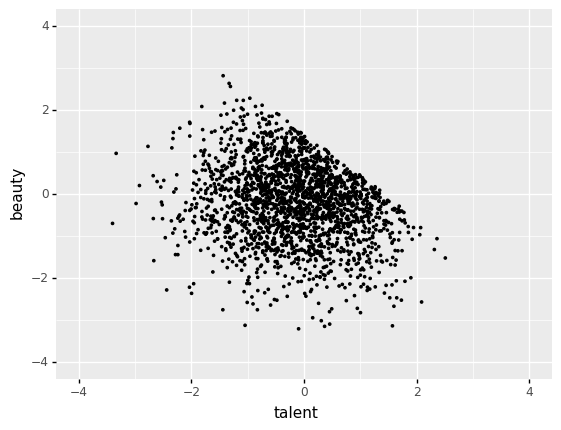

<ggplot: (172168617870)>

In [35]:
p.ggplot(start_is_born[start_is_born.star==0], p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

#### QUESTIONS
- What is the correlation between talent and beauty among stars?  Non-stars?
- But what is the correlation between talent and beauty in the population?

In [38]:
lm = sm.OLS.from_formula('beauty ~ talent', data=start_is_born[start_is_born.star==0]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     103.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           8.46e-24
Time:                        07:40:39   Log-Likelihood:                -2789.2
No. Observations:                2125   AIC:                             5582.
Df Residuals:                    2123   BIC:                             5594.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2557      0.020    -12.839      0.000      -0.295      -0.217
talent        -0.2241      0.022    -10.180      0.000      -0.267      -0.181
==============================================================================
Omnibus:                       28.520   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.313
Skew:                          -0.283   Prob(JB):                     4.31e-07
Kurtosis:                       3.108   Cond. No.                         1.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""